In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [25]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [26]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [28]:
df.sample(7)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
80,81,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9959.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
101,102,0,nissan dayz,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499.0
137,138,2,saab 99e,gas,turbo,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18620.0
139,140,2,subaru dl,gas,std,two,hatchback,fwd,front,93.7,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7053.0
94,95,1,nissan leaf,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7299.0
124,125,3,plymouth duster,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764.0


In [29]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Encoding Data

First I will encode some of the categorical features

In [31]:
df['fueltype'] = df['fueltype'].map({'gas': 0, 'diesel': 1})
df['aspiration'] = df['aspiration'].map({'std': 0, 'turbo': 1})
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['enginelocation'] = df['enginelocation'].map({'front': 0, 'rear': 1})
df['drivewheel'] = df['drivewheel'].map({'fwd': 0, 'rwd': 1, '4wd': 2})
df['enginetype'] = df['enginetype'].map({'dohc': 0, 'dohcv': 1, 'l': 2, 'ohc': 3, 'ohcf': 4, 'ohcv': 5, 'rotor': 6})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})
df['fuelsystem'] = df['fuelsystem'].map({'1bbl': 0, '2bbl': 1, '4bbl': 2, 'idi': 3, 'mfi': 4, 'mpfi': 5, 'spdi': 6, 'spfi': 7})
df['carbody'] = df['carbody'].map({'convertible': 0, 'hardtop': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4})

#### Feature Selection using Heatmap

In [32]:
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

<Axes: >

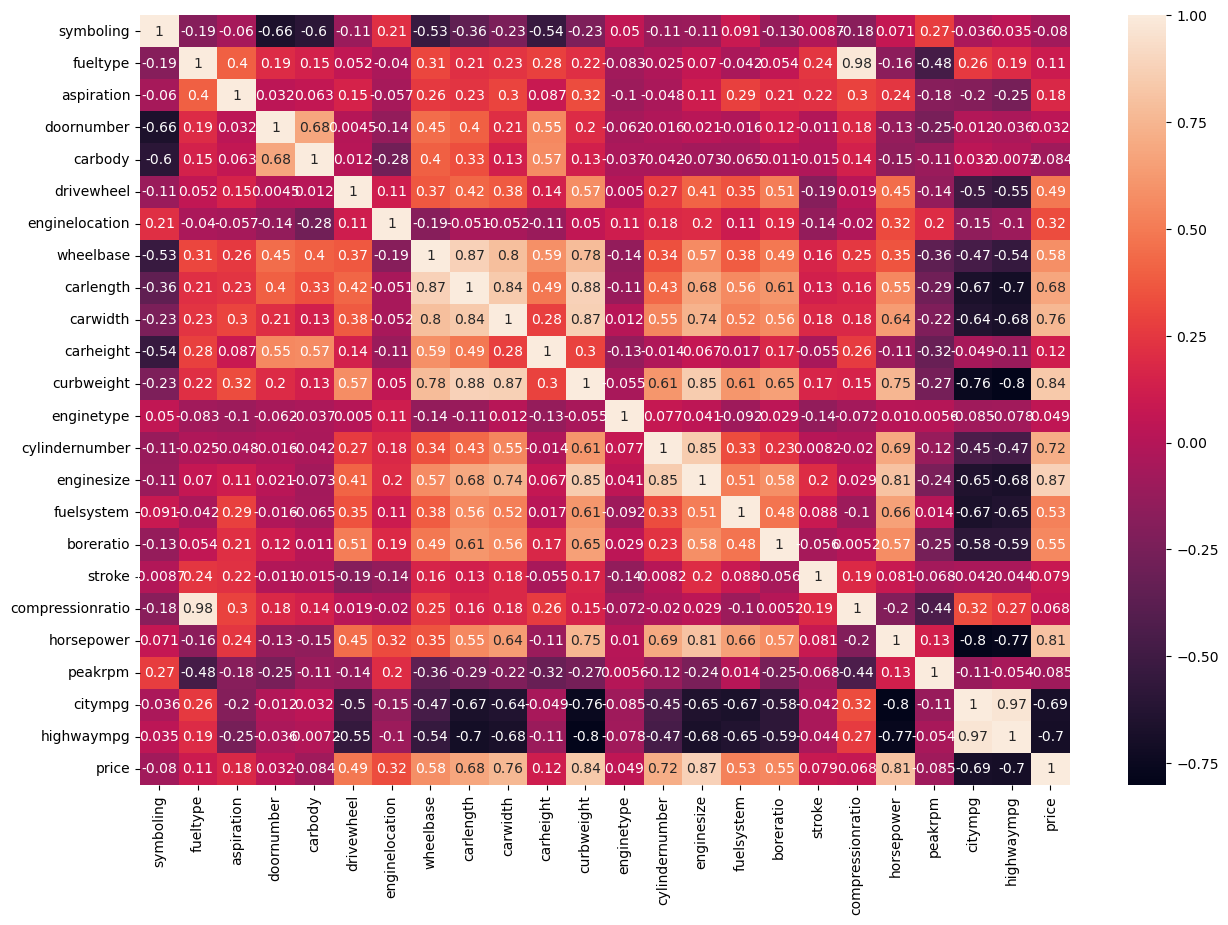

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

Looking at the correlation matrix, we can see which feature impacts the target variable 'Price'. Those features are:

* highwaympg
* citympg
* horsepower
* boreratio
* fuelsystem
* enginesize
* cylindernumber
* curbweight
* carwidth
* carlength
* wheelbase
* drivewheel

I will be dropping the rest of the features

In [34]:
df.drop(['peakrpm', 'compressionratio', 'stroke', 'enginetype', 'carheight', 'enginelocation', 'carbody', 'doornumber', 'aspiration', 'fueltype', 'symboling'], axis=1, inplace=True)

#### Feature Scaling

I am going to use min-max scaling to scale features to the range [0, 1]

In [35]:
def min_max_scaler(df):
    cols = df.columns.drop('price')
    for i in cols:
        df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())
    return df

In [36]:
df = min_max_scaler(df)

In [37]:
df.sample(7)

,drivewheel,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
131,0.0,0.276968,0.532836,0.525000,0.377036,0.2,0.267925,0.714286,0.657143,0.175000,0.277778,0.394737,9895.0
119,0.0,0.206997,0.241791,0.291667,0.248254,0.2,0.139623,0.857143,0.350000,0.225000,0.305556,0.368421,7957.0
14,0.5,0.492711,0.714925,0.550000,0.607836,0.4,0.388679,0.714286,0.550000,0.304167,0.194444,0.236842,24565.0
67,0.5,0.682216,0.743284,0.833333,0.786268,0.3,0.460377,0.428571,0.742857,0.312500,0.250000,0.236842,25552.0
164,0.5,0.230321,0.411940,0.308333,0.277735,0.2,0.139623,0.142857,0.464286,0.091667,0.444444,0.473684,8238.0
171,0.5,0.344023,0.523881,0.441667,0.475562,0.2,0.320755,0.714286,0.771429,0.283333,0.305556,0.368421,11549.0
64,0.0,0.355685,0.547761,0.516667,0.363460,0.2,0.230189,0.142857,0.607143,0.150000,0.361111,0.421053,11245.0


#### Defining the Functions for the Model

In [38]:
def compute_cost(w, b, x, y):
    m = x.shape[0]
    f_wb = np.dot(x, w) + b
    cost = np.sum((f_wb - y) ** 2) / (2*m)
    return cost

def gradient_descent(w, b, x, y):
    m, n = x.shape
    f_wb = np.dot(x, w) + b
    err = f_wb - y
    dj_dw = np.dot(x.T, err) / m
    dj_db = np.sum(err) / m
    return dj_dw, dj_db

def compute_GD(w, b, x, y, alpha, epochs, stopping_criteria=0.0001): # using stopping criteria to avoid overfitting
    JHistory = []

    for i in range(epochs):
        dj_dw, dj_db = gradient_descent(w, b, x, y)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            JHistory.append(compute_cost(w, b, x, y))
    
        if i% math.ceil(epochs/10) == 0:
            print("Iteration {:4d}, cost is {:8.2f}".format(i,JHistory[-1]))

        if i > 1 and abs(JHistory[-1] - JHistory[-2]) < stopping_criteria:
            break

    return w, b, JHistory

#### Training the Model

In [39]:
epochs = 1000000
alpha = 0.0001

w = np.zeros(df.shape[1] - 1)
b = 0

y = df['price'].values
x = df.drop('price', axis=1).values

In [40]:
w, b, JHistory = compute_GD(w, b, x, y, alpha, epochs)

Iteration    0, cost is 119832242.26
Iteration 100000, cost is 8469530.05
Iteration 200000, cost is 8469530.05
Iteration 300000, cost is 8469530.05
Iteration 400000, cost is 8469530.05
Iteration 500000, cost is 8469530.05
Iteration 600000, cost is 8469530.05
Iteration 700000, cost is 8469530.05
Iteration 800000, cost is 8469530.05
Iteration 900000, cost is 8469530.05


#### Calculating the Accuracy of the Model

In [41]:
y_pred = []
for i in range(len(x)):
    y_pred.append(np.dot(x[i], w) + b)

In [42]:
def accuracy(y, y_pred):
    m = len(y)
    error = 0
    for i in range(m):
        error += abs(y[i] - y_pred[i]) / y[i]
    return (1 - error/m) * 100

In [43]:
accuracy(y, y_pred)

82.41415086157046